### SpO2 (Oxygen Saturation):

- Range: 0 to 100%
- Units: Percentage (%)
- This indicates the percentage of oxygen-saturated hemoglobin in the blood.

### Heart Rate (HR):

- Range: 30 to 250 beats per minute (bpm)
- Units: Beats per minute (bpm)
- This measures the number of heartbeats per minute.

### Mild to Moderate Depression:

- Heart Rate: In the early stages of depression, individuals might experience changes in heart rate due to increased stress, anxiety, or disrupted sleep. Typically, the heart rate may be slightly elevated (tachycardia) or, in some cases, lower than normal (bradycardia) due to a reduction in physical activity and energy levels.
- Range: 60-100 bpm (normal to slightly elevated or slightly decreased).
- SpO2: Oxygen saturation might remain normal, as there is no severe compromise in lung or heart function. However, if the person is experiencing poor sleep quality (e.g., insomnia or sleep apnea), there could be subtle changes in SpO2, such as mild hypoxemia (lower than usual oxygen levels) during sleep.
Range: 95-100% (normal or slightly reduced).

### Severe Depression:

- Heart Rate: As depression becomes more severe, individuals often report higher levels of fatigue, stress, and anxiety. These factors can contribute to either an increased heart rate (due to heightened anxiety or stress) or a reduced heart rate (due to the body’s decreased overall activity and energy levels). Severe depression may also lead to autonomic dysfunction, which can affect heart rate variability.
- Range: Heart rate may fluctuate between 50-120 bpm, with either tachycardia or bradycardia.
- SpO2: In severe cases, where depression leads to poor physical health, such as reduced exercise, chronic stress, or poor sleep patterns (like sleep apnea or disrupted breathing during sleep), SpO2 levels could be slightly reduced. Long-term depression could also contribute to a decline in respiratory function, particularly if it affects overall fitness and increases sedentary behavior.
Range: May range from 90-98%, with possible dips below normal during sleep.

### Chronic Depression (with Comorbidities like Anxiety or Sleep Disorders):

- Heart Rate: Chronic depression can lead to a consistent state of autonomic dysregulation, which may cause irregular heart rates or exacerbate pre-existing conditions like arrhythmias. This could result in elevated heart rates or noticeable fluctuations between rest and activity.
- Range: Could be highly variable, ranging from 50 to 120 bpm or more.
- SpO2: If chronic depression is associated with poor physical activity, obesity, or other health issues like sleep apnea, SpO2 could dip further, especially during sleep or periods of physical inactivity. Some individuals may experience significant nocturnal hypoxia.
Range: 90-95% during waking hours, with possible dips below 90% during sleep.

### Heart Rate (bpm): Typically ranges from 50 to 120 bpm.

- For No Depression, heart rate would mostly fall between 60-80 bpm.
- For Mild Depression, heart rate may range between 70-90 bpm.
- For Moderate Depression, heart rate may be between 80-100 bpm.
- For Severe Depression, heart rate may range from 90-120 bpm.

### SpO2 (%): Normally falls between 90-100%.

- For No Depression, SpO2 would typically be around 95-100%.
- For Mild Depression, it would be around 93-98%.
- For Moderate Depression, it may range from 90-95%.
- For Severe Depression, it may fall between 85-90%, especially during sleep or reduced physical activity.

### Labels

- 0: No Depression (Healthy)
- 1: Mild Depression
- 2: Moderate Depression
- 3: Severe Depression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# Load the dataset 
df = pd.read_csv(r'C:\Users\OMOLP094\Desktop\WORK_FROM_NOV_2024\Depression_Prediction_from_Heart_Rate_and_spO2\depression_stage_data.csv')

### Preprocessing

In [4]:
# Check for any missing values (shouldn't be any in the synthetic dataset)
print(df.isnull().sum())

Heart Rate (bpm)    0
SpO2 (%)            0
Depression Stage    0
dtype: int64


In [5]:
# Normalize the features (Heart Rate and SpO2)
scaler = StandardScaler()
df[['Heart Rate (bpm)', 'SpO2 (%)']] = scaler.fit_transform(df[['Heart Rate (bpm)', 'SpO2 (%)']])

In [6]:
df.head()

,Heart Rate (bpm),SpO2 (%),Depression Stage
0,1.794197,-1.847253,3
1,-0.357462,0.637284,1
2,-0.644350,-0.108077,1
3,0.933533,-1.350346,3
4,0.288035,0.388830,1


### Training Data Preparation

In [7]:
# Encode the Depression Stage (it’s already numerical, no need for further encoding)
X = df[['Heart Rate (bpm)', 'SpO2 (%)']]  # Features
y = df['Depression Stage']  # Target variable

In [8]:
X

,Heart Rate (bpm),SpO2 (%)
0,1.794197,-1.847253
1,-0.357462,0.637284
2,-0.644350,-0.108077
3,0.933533,-1.350346
4,0.288035,0.388830
...,...,...
995,0.072870,0.388830
996,-0.716072,0.885738
997,-1.361570,1.631099
998,2.367972,-1.598800


In [9]:
y

0      3
1      1
2      1
3      3
4      1
      ..
995    2
996    1
997    0
998    3
999    2
Name: Depression Stage, Length: 1000, dtype: int64

### Dataset Splitting

In [10]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

In [11]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

### Metrics

In [12]:
# Training and Evaluation
results = {
    'Model': [],
    'Accuracy': [],
    'Precision (Macro)': [],
    'Recall (Macro)': [],
    'F1-Score (Macro)': []
}

### Model Training

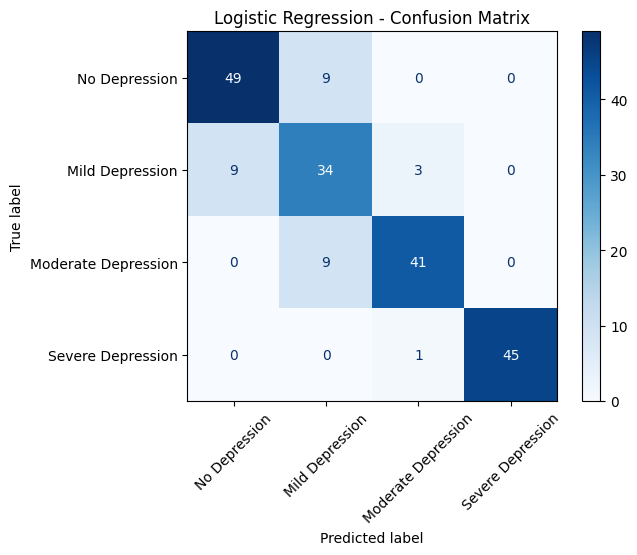

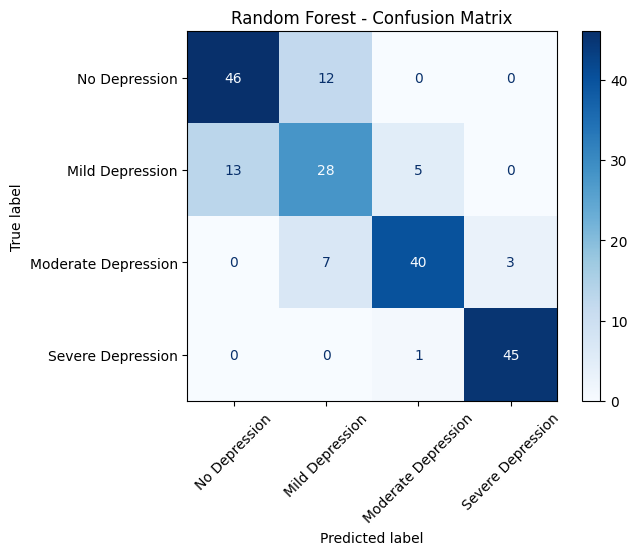

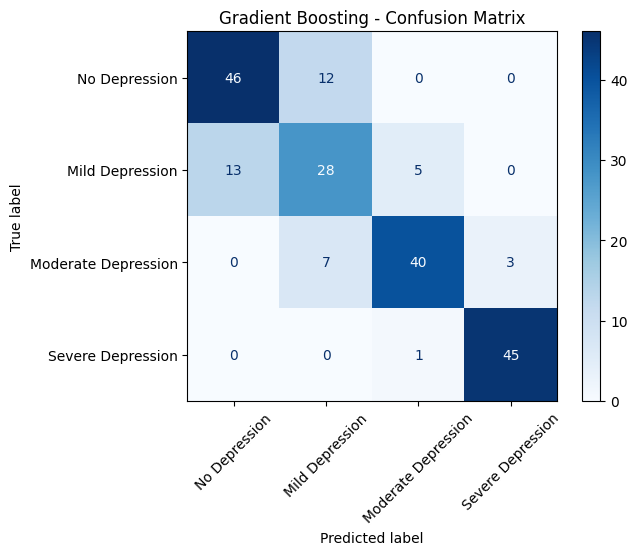

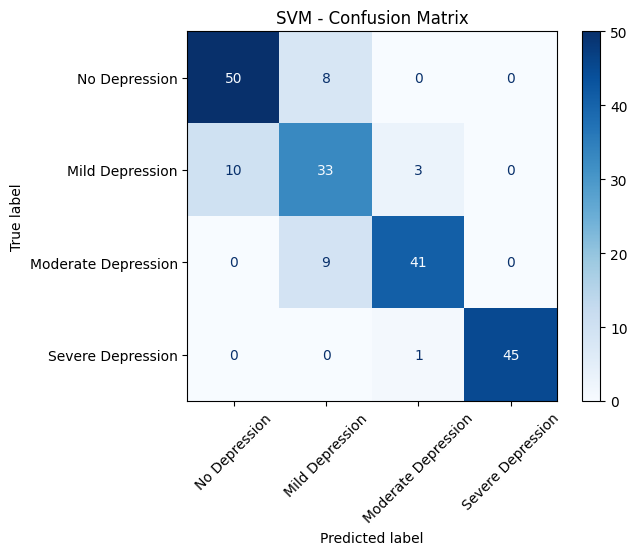

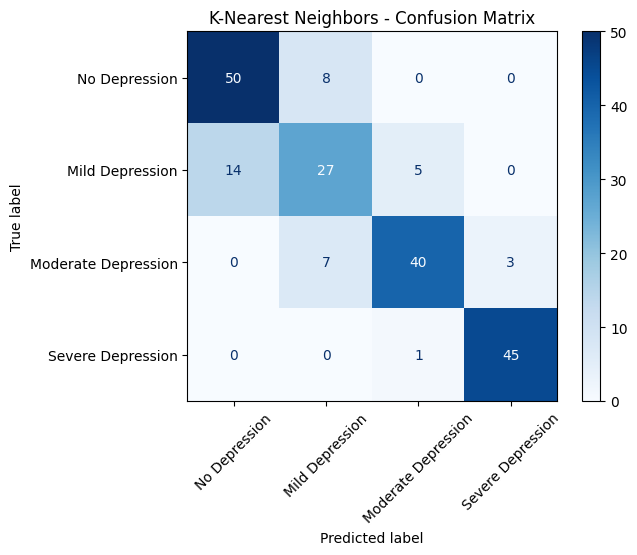

In [14]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision (Macro)'].append(classification_rep['macro avg']['precision'])
    results['Recall (Macro)'].append(classification_rep['macro avg']['recall'])
    results['F1-Score (Macro)'].append(classification_rep['macro avg']['f1-score'])

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression'])
    disp.plot(cmap='Blues')

    # Rotate x-axis labels to 45 degrees
    plt.xticks(rotation=45)

    # Set the title for the plot
    plt.title(f'{model_name} - Confusion Matrix')

    # Show the plot
    plt.show()


Model Evaluation Results:
                 Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0  Logistic Regression     0.845           0.852446        0.845555   
1        Random Forest     0.795           0.795618        0.795015   
2    Gradient Boosting     0.795           0.795618        0.795015   
3                  SVM     0.845           0.851111        0.844430   
4  K-Nearest Neighbors     0.810           0.807793        0.806822   
5  Logistic Regression     0.845           0.852446        0.845555   
6        Random Forest     0.795           0.795618        0.795015   
7    Gradient Boosting     0.795           0.795618        0.795015   
8                  SVM     0.845           0.851111        0.844430   
9  K-Nearest Neighbors     0.810           0.807793        0.806822   

   F1-Score (Macro)  
0          0.847719  
1          0.794814  
2          0.794814  
3          0.846782  
4          0.806022  
5          0.847719  
6          0.794814  
7          0.794

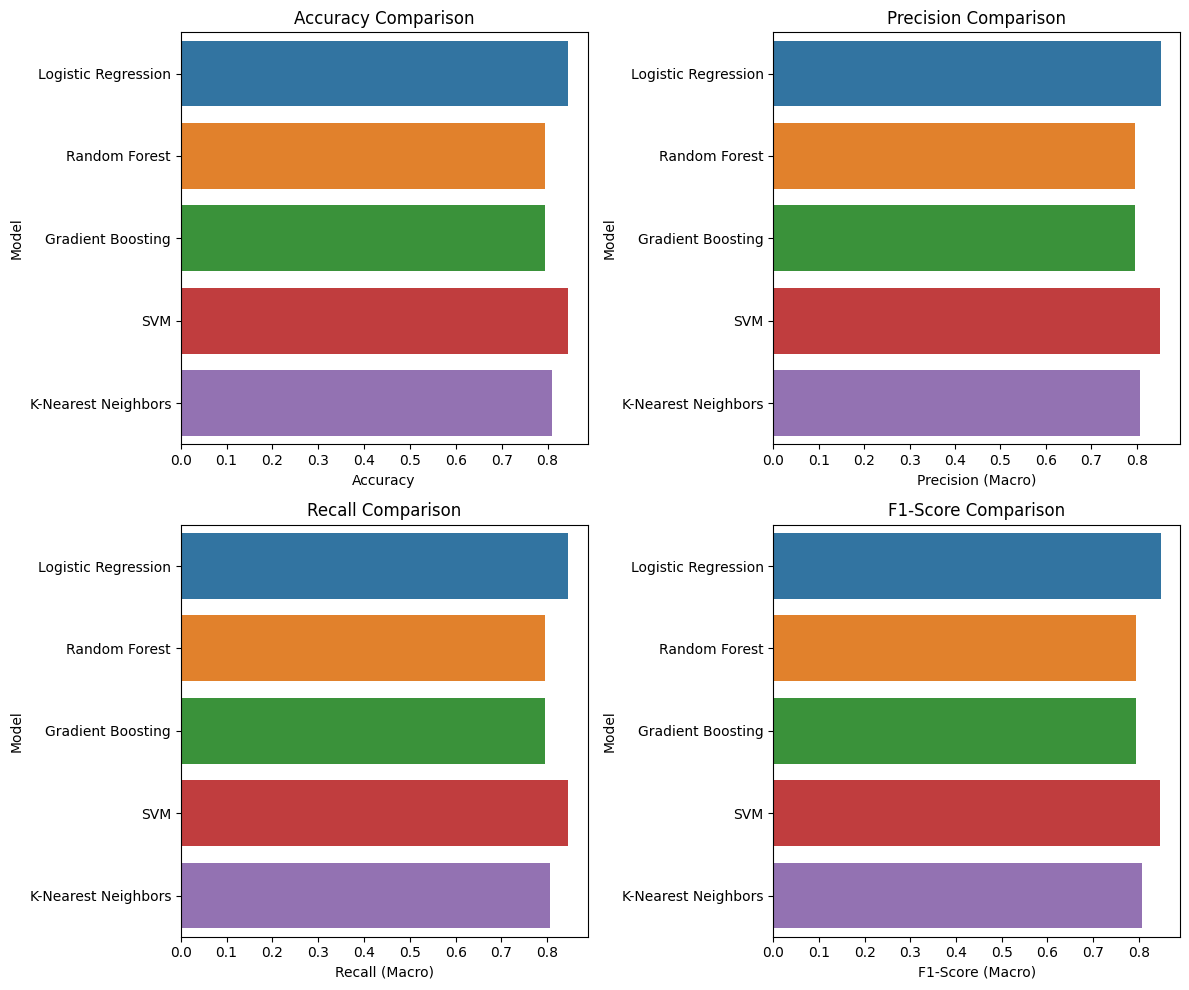

In [15]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Show the evaluation results
print("Model Evaluation Results:")
print(results_df)

# Visualize the performance
# Bar plots for Accuracy, Precision, Recall, and F1-Score
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
sns.barplot(x='Accuracy', y='Model', data=results_df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')

# Precision plot
sns.barplot(x='Precision (Macro)', y='Model', data=results_df, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')

# Recall plot
sns.barplot(x='Recall (Macro)', y='Model', data=results_df, ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison')

# F1-Score plot
sns.barplot(x='F1-Score (Macro)', y='Model', data=results_df, ax=axes[1, 1])
axes[1, 1].set_title('F1-Score Comparison')

# Adjust layout
plt.tight_layout()
plt.show()
